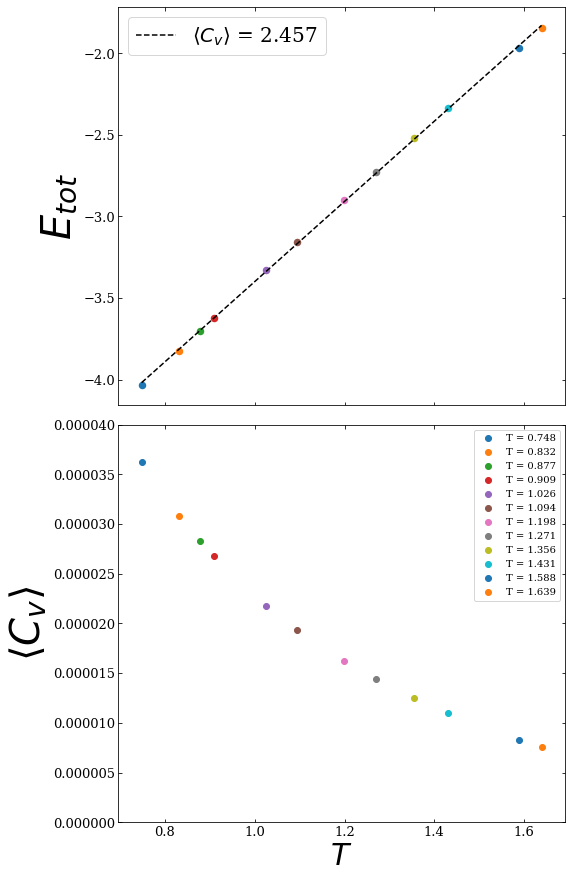

In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import matplotlib.colors as colors
from matplotlib import *
import sys
from pylab import *
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
import scipy
#import pymc
from astropy.io import fits
import math
import os,glob
import matplotlib.patches as mpatches
import numpy.polynomial.polynomial as poly



mylist11 = []
mylist12 = []


plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
#mpl.rcParams['axes.labelsize'] = 18

fig = plt.figure(figsize=(8,15)) # Notice the equal aspect ratio


# equivalent but more general
ax1=plt.subplot(2,1, 1)#, gridspec_kw={"width_ratios":1})
ax2=plt.subplot(2,1, 2)#, gridspec_kw={"width_ratios":1}) 


fig.subplots_adjust(wspace=0, hspace=0.05)
#ax1.set_xlim(0.05,1.)
#ax1.set_ylim(2.2,2.6)
ax2.set_ylim(0.0,0.00004)
#ax2.set_ylim(0.,0.7)
ax1.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax2.tick_params(which="both",direction='in', bottom="on", top="on", left="on", right="on")
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel(r'$E_{tot}$',fontsize=40)
ax2.set_ylabel(r'$\left \langle C _{v} \right \rangle$',fontsize=40)
ax2.set_xlabel(r'$T$',fontsize=30)


    
appendT = []
appendE = []

folder_path = '/home/pedro/Desktop/Fisica-Computacional-master/MD/corridas/Data/'
for filename in sorted(glob.glob(os.path.join(folder_path,'Treal'+'_'+'*.dat'))):
    dataDMO = pd.read_table(filename, header=None, sep="\s+")
    ken        =dataDMO.iloc[:,0]
    En         =dataDMO.iloc[:,1]
    x=ken
    y=En
    Tprom=np.mean(En)
    appendT.append(Tprom)


counter = -1

folder_path = '/home/pedro/Desktop/Fisica-Computacional-master/MD/corridas/Data/'
for filename in sorted(glob.glob(os.path.join(folder_path,'Etot'+'_'+'*.dat'))):
    filenameT=filename.split('=')[3]
    filenameT=filenameT.split('.d')[0]
    Tint=float(filenameT)
    data = pd.read_table(filename, header=None, sep="\s+")
    data = data[data.iloc[:,0].between(0.499, 99.9,inclusive=True)]        #appended_data.append(data)

    kmag        =data.iloc[:,0]
    Mag         =data.iloc[:,1]
    x=kmag
    y=Mag
    Emean=np.mean(Mag)
    appendE.append(Emean)
    

    counter = counter + 1

    ax1.scatter(appendT[counter], Emean, linewidth=1.5)
x=appendT
y=appendE
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 

coefs = poly.polyfit(x,y , 1)

ax1.plot(x, fit_fn(x), '--k',label=r'$\left \langle C _{v} \right \rangle$ = %.3f' %(coefs[1]))
    
counter = -1

            
folder_path = '/home/pedro/Desktop/Fisica-Computacional-master/MD/corridas/Data/'
for filename in sorted(glob.glob(os.path.join(folder_path,'Etot'+'_'+'*.dat'))):
    filenameT=filename.split('=')[3]
    filenameT=filenameT.split('.d')[0]
    Tint=float(filenameT)
    dataDMO = pd.read_table(filename, header=None, sep="\s+")
    dataDMO = dataDMO[dataDMO.iloc[:,0].between(0.499, 99.9,inclusive=True)]        #appended_data.append(data)
    ken        =dataDMO.iloc[:,0]
    En         =dataDMO.iloc[:,1]
    counter = counter + 1
    Emean=np.mean(En)
    ECv=len(En)*(len(En)-len(En)*appendT[counter]*(3.*len(En)/2. - 1. )*(Emean)**(-1.))**(-1.)

    x=ken
    y=En
    ax2.scatter(appendT[counter], ECv, linewidth=1.,label=r'T = %.3f' %(appendT[counter]))
    

        
ax1.legend(fontsize=20.)
ax2.legend(fontsize=10.)



plt.savefig('/home/pedro/Desktop/Fisica-Computacional-master/MD/Cv.pdf', bbox_inches='tight', rasterized=True, dpi=300) ### for publication



